# Final Project 2 : Logistik regression dan SVM
# Rain in Australia

 Nama : Wilda Amrul Munafiah
 
 Program : Python for Data Science
 
 Kode Peserta : PYTN-KS16-021

# A. Perkenalan

## Projects Overview
Dataset dapat diperoleh dari kaggle dan dapat diakses melalui link berikut : https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

Database ini memiliki 23 atribut. Dengan data hujan harian selama 10 tahun di Australia,
kolom RainTomorrow adalah target variable yang mau kita prediksi. Jika “Yes” maka
besok harinya disana hujan 1mm atau lebih.

## Attribute Information:
1. Date - tanggal hari itu
2. Location - lokasi, nama kota di Australia
3. MinTemp - temperatur terendah hari itu dalam celcius
4. MaxTemp - temperatur tertinggi hari itu dalam celcius
5. Rainfall - jumlah curah hujan hari itu dalam mm
6. Evaporation - jumlah evaporasi dalam mm dari Class A pan selama 24 jam
sebelum jam 9 pagi hari itu
7. Sunshine - jumlah jam hari itu cerah dengan cahaya matahari
8. WindGustDir - arah kecepatan angin yang paling tinggi selama 24 jam sebelum
jam 12 malam hari itu
9. WindGustSpeed - kecepatan angin yang paling tinggi dalam km/jam selama 24
jam sebelum jam 12 malam hari itu
10. WindDir9am - arah angin jam 9 pagi
11. WindDir3pm - arah angin jam 3 sore
12. WindSpeed9am - kecepatan angin jam 9 pagi dalam km/jam dihitung dari
rata-rata kecepatan angin 10 menit sebelum jam 3 sore
13. WindSpeed3pm - kecepatan angin jam 3 sore dalam km/jam dihitung dari
rata-rata kecepatan angin 10 menit sebelum jam 3 sore
14. Humidity9am - humiditas jam 9 pagi dalam persen
15. Humidity3pm - humiditas jam 3 sore dalam persen
16. Pressure9am - tekanan udara jam 9 pagi dalam hpa
17. Pressure3pm - tekanan udara jam 3 sore dalam hpa
18. Cloud9am - persentase langit yang tertutup awan jam 9 pagi. dihitung dalam
oktas, unit ⅛, menghitung berapa unit ⅛ dari langit yang tertutup awan. Jika 0,
langit cerah, jika 8, langit sepenuhnya tertutup awan.
19. Cloud3pm - persentase langit yang tertutup awan jam 3 sore
20. Temp9am - temperatur jam 9 pagi dalam celcius
21. Temp3pm - temperatur jam 3 sore dalam celcius
22. RainToday - apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi
melebihi 1mm, maka nilai ini adalah 1, jika tidak nilai nya 0
23. RainTomorrow - variable yang mau di prediksi

# B. Import Library
Cell pertama pada notebook harus berisi dan hanya berisi semua library
yang digunakan dalam project.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
from tabulate import tabulate

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pickle

# C. Loading Data
Bagian ini berisi proses data loading yang kemudian dilanjutkan dengan
explorasi data secara sederhana

In [3]:
df=pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [7]:
df.describe(include='O')

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


In [8]:
# Melihat jumlah unique value pada masing2 atribut
for col in df.columns:
    print(col,':', df[col].nunique())

Date : 3436
Location : 49
MinTemp : 389
MaxTemp : 505
Rainfall : 681
Evaporation : 358
Sunshine : 145
WindGustDir : 16
WindGustSpeed : 67
WindDir9am : 16
WindDir3pm : 16
WindSpeed9am : 43
WindSpeed3pm : 44
Humidity9am : 101
Humidity3pm : 101
Pressure9am : 546
Pressure3pm : 549
Cloud9am : 10
Cloud3pm : 10
Temp9am : 441
Temp3pm : 502
RainToday : 2
RainTomorrow : 2


In [9]:
df.duplicated().any()

False

In [10]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [11]:
df.shape

(145460, 23)

# D. Data Cleaning

Bagian ini berisi proses penyiapan data berupa data cleaning sebelum
dilakukan explorasi data lebih lanjut. Proses cleaning dapat berupa
memberi nama baru untuk setiap kolom, mengisi missing values,
menghapus kolom yang tidak dipakai, dan lain sebagainya.

In [12]:
#handling missing value pada kolom bertipe categorical
categorical = [i for i in df.columns if df[i].dtypes == 'O']

for cat_col in categorical:
    df[cat_col].fillna(df[cat_col].mode()[0],inplace=True)
    
df[categorical].isnull().sum()
     

Date            0
Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [13]:
#handling missing value pada kolom bertipe numerical
numerical = [i for i in df.columns if i not in categorical]

for num_col in numerical:
    df[num_col].fillna(df[num_col].median(),inplace=True)
    
df[numerical].isnull().sum()
     

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

Seluruh Missing value pada masing-masing atribut dataframe sudah terisi semua

# E. Eksplorasi Data

Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan
query, grouping, visualisasi sederhana, dan lain sebagainya.

In [14]:
#melihat banyaknya nilai dari masing-masing atribut
for col in df.columns:
    print(col, ': ')
    print(df[col].value_counts())
    print('\n','#'*60,'\n')

Date : 
2013-11-12    49
2014-09-01    49
2014-08-23    49
2014-08-24    49
2014-08-25    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: Date, Length: 3436, dtype: int64

 ############################################################ 

Location : 
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree         

array([[<Axes: title={'center': 'MinTemp'}>,
        <Axes: title={'center': 'MaxTemp'}>,
        <Axes: title={'center': 'Rainfall'}>,
        <Axes: title={'center': 'Evaporation'}>],
       [<Axes: title={'center': 'Sunshine'}>,
        <Axes: title={'center': 'WindGustSpeed'}>,
        <Axes: title={'center': 'WindSpeed9am'}>,
        <Axes: title={'center': 'WindSpeed3pm'}>],
       [<Axes: title={'center': 'Humidity9am'}>,
        <Axes: title={'center': 'Humidity3pm'}>,
        <Axes: title={'center': 'Pressure9am'}>,
        <Axes: title={'center': 'Pressure3pm'}>],
       [<Axes: title={'center': 'Cloud9am'}>,
        <Axes: title={'center': 'Cloud3pm'}>,
        <Axes: title={'center': 'Temp9am'}>,
        <Axes: title={'center': 'Temp3pm'}>]], dtype=object)

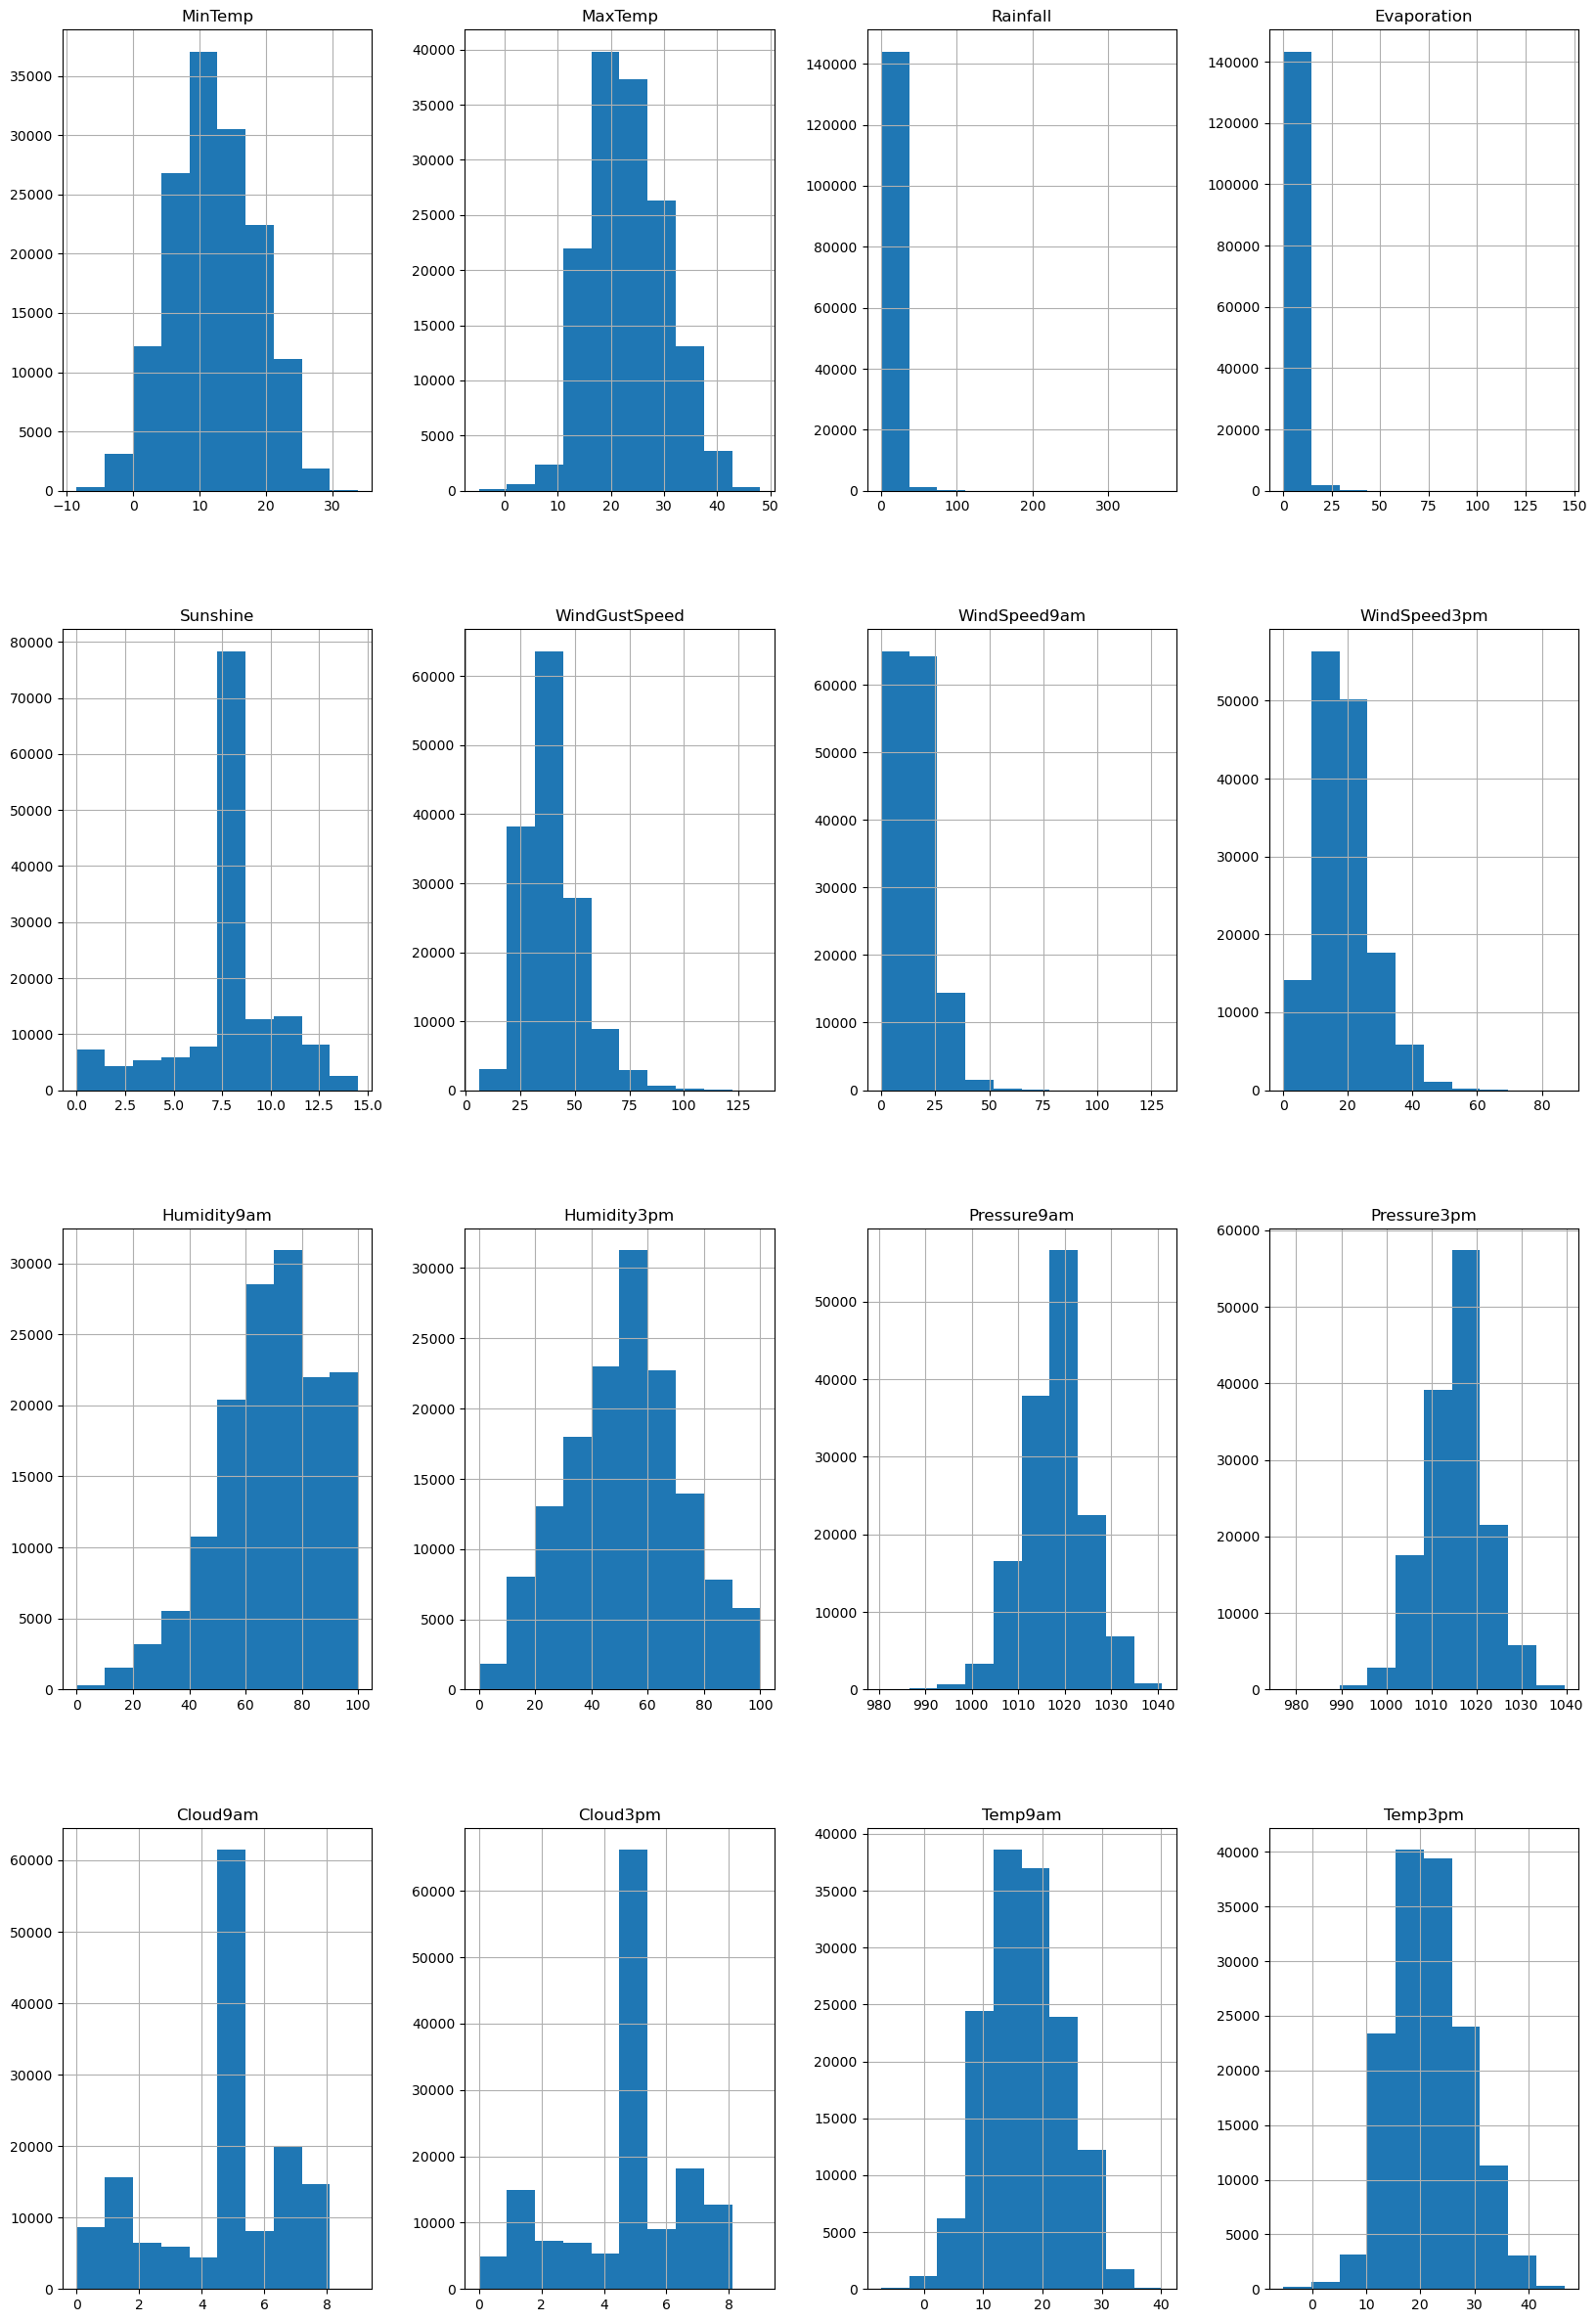

In [15]:
df.hist(figsize=(20,30))

#### 1. hubungan antara temperatur terhadap curah hujan

<Axes: xlabel='MaxTemp', ylabel='MinTemp'>

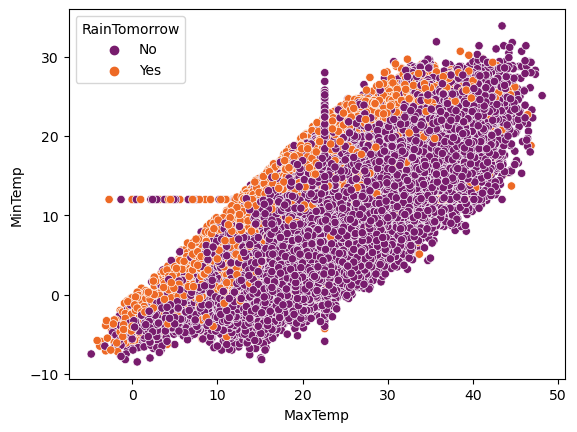

In [16]:
sns.scatterplot(x = 'MaxTemp', y = 'MinTemp', hue = 'RainTomorrow' , palette = 'inferno',data = df)

#### Melihat hubungan antar variabel

C:\Users\ACER\AppData\Local\Temp\ipykernel_14308\3549959252.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='Blues')


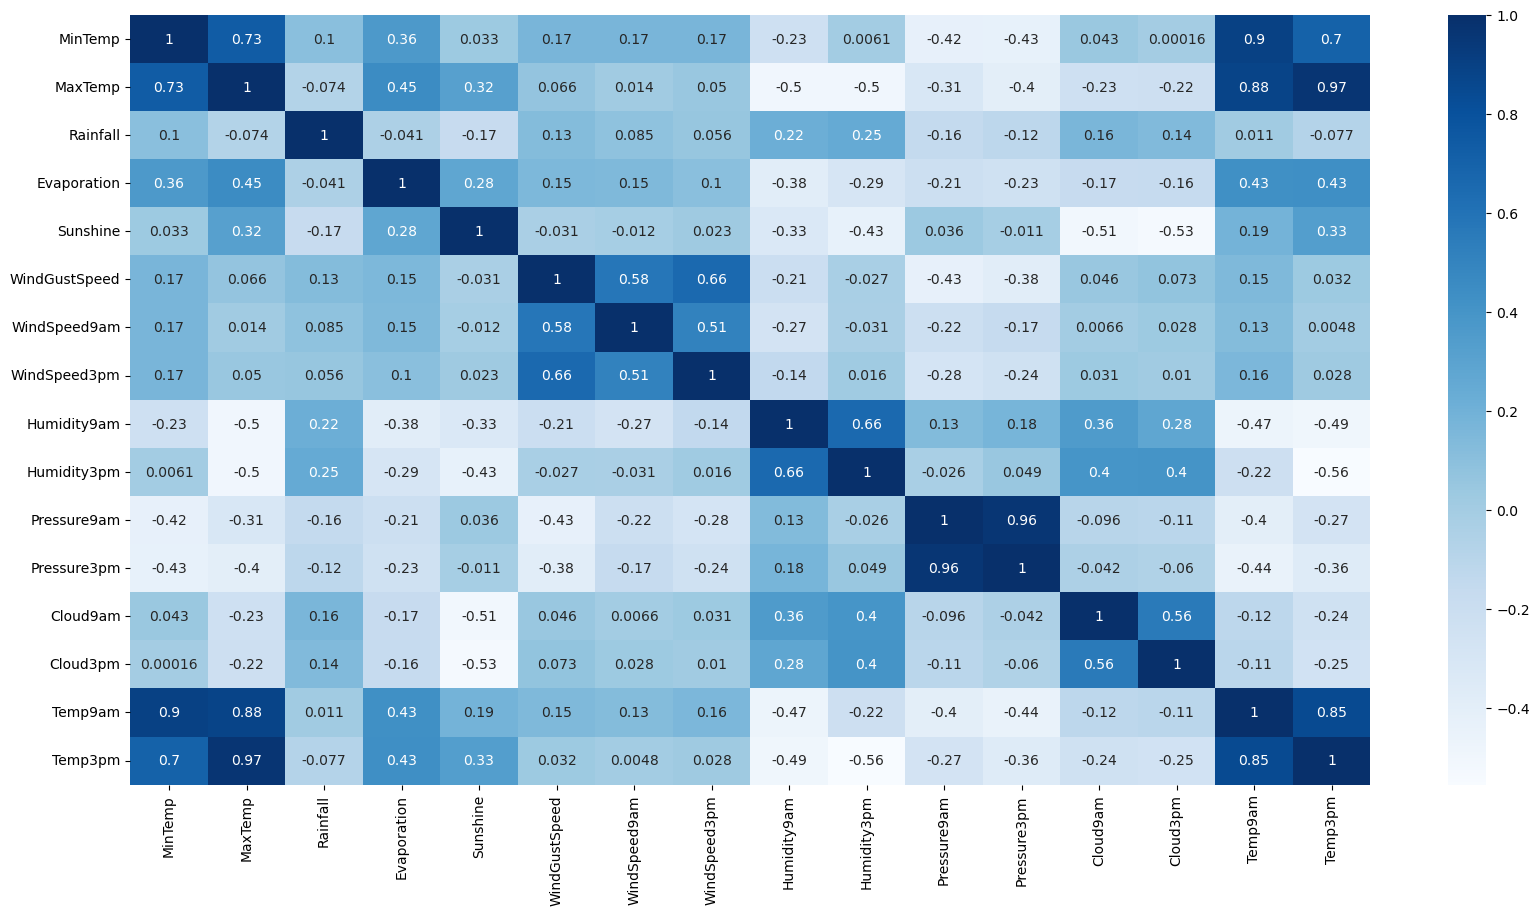

In [17]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

#### Insight :
Berdasrakan visualisasi dengan heatmap, dapat disimpulkan  bahwa:

    - antar kolom temperatur memiliki korelasi dengan nilai 0,73
    
    - antar kolom Awan memiliki korelasi dengan nilai 0,56
    
    - antar kolom kelembapan memiliki korelasi dengan nilai 0,66

In [18]:
df.RainToday = df.RainToday.map({'No': 0, 'Yes': 1})
df.RainToday.value_counts(normalize=True)

0    0.780833
1    0.219167
Name: RainToday, dtype: float64

In [19]:
df.RainTomorrow = df.RainTomorrow.map({'No': 0, 'Yes': 1})
df.RainTomorrow.value_counts(normalize=True)

0    0.780854
1    0.219146
Name: RainTomorrow, dtype: float64

# F.  Data Preprocessing

Bagian ini berisi proses penyiapan data untuk proses pelatihan model,
seperti pembagian data menjadi train-dev-test, transformasi data
(normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.


In [20]:
#### 1. Inisialisasi variabel x dan y
x = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']

print(x.shape)
print(y.shape)

(145460, 22)
(145460,)


In [21]:
# Convert kolom rain today dan rain tomorrow ke biner
df['RainToday'].replace({'No':0, 'Yes': 1}, inplace = True)
df['RainTomorrow'].replace({'No':0, 'Yes': 1}, inplace = True)

In [22]:
# Convert kolom Location ke biner
def encode_data(feature_name):
     
    mapping_dict = {}
    unique_values = list(df[feature_name].unique())
    for idx in range(len(unique_values)):
        mapping_dict[unique_values[idx]] = idx
    print(mapping_dict)
    return mapping_dict

df['Location'].replace(encode_data('Location'), inplace = True)

{'Albury': 0, 'BadgerysCreek': 1, 'Cobar': 2, 'CoffsHarbour': 3, 'Moree': 4, 'Newcastle': 5, 'NorahHead': 6, 'NorfolkIsland': 7, 'Penrith': 8, 'Richmond': 9, 'Sydney': 10, 'SydneyAirport': 11, 'WaggaWagga': 12, 'Williamtown': 13, 'Wollongong': 14, 'Canberra': 15, 'Tuggeranong': 16, 'MountGinini': 17, 'Ballarat': 18, 'Bendigo': 19, 'Sale': 20, 'MelbourneAirport': 21, 'Melbourne': 22, 'Mildura': 23, 'Nhil': 24, 'Portland': 25, 'Watsonia': 26, 'Dartmoor': 27, 'Brisbane': 28, 'Cairns': 29, 'GoldCoast': 30, 'Townsville': 31, 'Adelaide': 32, 'MountGambier': 33, 'Nuriootpa': 34, 'Woomera': 35, 'Albany': 36, 'Witchcliffe': 37, 'PearceRAAF': 38, 'PerthAirport': 39, 'Perth': 40, 'SalmonGums': 41, 'Walpole': 42, 'Hobart': 43, 'Launceston': 44, 'AliceSprings': 45, 'Darwin': 46, 'Katherine': 47, 'Uluru': 48}


In [23]:
# Membuat model Fit untuk Permodelan
x_fit = df[['Location','MinTemp', 'Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Cloud9am','Cloud3pm','RainToday']]
x_fit

,Location,MinTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday
0,0,13.4,0.6,44.0,20.0,24.0,71.0,22.0,8.0,5.0,0
1,0,7.4,0.0,44.0,4.0,22.0,44.0,25.0,5.0,5.0,0
2,0,12.9,0.0,46.0,19.0,26.0,38.0,30.0,5.0,2.0,0
3,0,9.2,0.0,24.0,11.0,9.0,45.0,16.0,5.0,5.0,0
4,0,17.5,1.0,41.0,7.0,20.0,82.0,33.0,7.0,8.0,0
...,...,...,...,...,...,...,...,...,...,...,...
145455,48,2.8,0.0,31.0,13.0,11.0,51.0,24.0,5.0,5.0,0
145456,48,3.6,0.0,22.0,13.0,9.0,56.0,21.0,5.0,5.0,0
145457,48,5.4,0.0,37.0,9.0,9.0,53.0,24.0,5.0,5.0,0
145458,48,7.8,0.0,28.0,13.0,7.0,51.0,24.0,3.0,2.0,0


In [24]:
# Menentukan Data testing dan Data training
x_train, x_test, y_train, y_test = train_test_split(x_fit, y, test_size=0.30, random_state=13)
print(x_train.shape)
print(x_test.shape)

(101822, 11)
(43638, 11)


Diperoleh :

    Data Training sebanyak 101822
    Data Testing sebanyak 43638

# G. Pendefinisian Model

Bagian ini berisi cell untuk mendefinisikan model sampai kompilasi model.
Akan lebih bagus jika didahului dengan penjelasan mengapa memilih
arsitektur atau jenis model tertentu, alasan memilih nilai hyperparameter,
dan hal lain yang berkaitan.

 ### 1. Model Logistik Regression

In [25]:
logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg

LogisticRegression(random_state=0, solver='liblinear')

### 2. Model Support Vector Machines (SVM)

In [26]:
svm_model = SVC(kernel='linear') 
svm_model

SVC(kernel='linear')

# H. Pelatihan Model

Cell pada bagian ini hanya berisi code untuk melatih model dan output yang
dihasilkan.


### 1. Model Logistik Regression

In [27]:
logreg = logreg.fit(x_train, y_train)
logreg

LogisticRegression(random_state=0, solver='liblinear')

### 2. Model Support Vector Machines (SVM)

In [28]:
svm_model = SVC(kernel='linear') 
svm_model

SVC(kernel='linear')

In [ ]:
clf = svm.SVC(kernel = 'linear')
clf.fit(x_train, y_train)

In [ ]:
model = svm.SVC()
model.fit(x_train, y_train)
pred_test=model.predict(x_test)

In [ ]:
svm = svm_model.fit(x_train, y_train)
svm

# I. Evaluasi Model

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan
bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus
dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan
model. Jika memilih untuk melakukan model deployment, lanjut ke poin
dibawah. Jika tidak, lanjut ke poin 5 dan 6.


### 1. Model Logistik Regression

In [ ]:
# memeriksa performa dengan .prdict_proba()
logreg.predict_proba(x_test)

In [ ]:
y_pred_logreg = logreg.predict(x_test)
y_pred_logreg

In [ ]:
#melihat nilai akurasi 
print("Test score:", logreg.score(x_test, y_test))
print("Train score:", logreg.score(x_train, y_train))
     

In [ ]:
confusion_matrix(y_test, y_pred_logreg)

In [ ]:
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm_logreg, annot=True, fmt="d", linewidths=.5, cmap = 'Greens')
plt.title('Logistic Regression', fontsize=19)
plt.show()
print(classification_report(y_test, y_pred_logreg))
     

In [ ]:
# Hasil yang diperoleh

print('Ringkasan Evaluasi Model Logistic Regression')
print('Akurasi :', accuracy_score(y_test, y_pred_logreg))
print('Recall :', recall_score(y_test,y_pred_logreg))
print('F1 Score :', f1_score(y_test,y_pred_logreg))

### 2. Model Support Vector Machines (SVM)

In [ ]:
y_pred_svm = model_2.predict(x_test)
y_pred_svm

In [ ]:
confusion_matrix(y_test, y_pred_svm)
     

In [ ]:
# Mengukur akurasi model
accuracy = accuracy_score(y_test, y_pred)
accuracy_trainsvm = model_lr.score(X_train, y_train)
print(f'Akurasi model SVM: {accuracy * 100:.2f}%')
print(f'Akurasi model SVM: {accuracy_trainsvm * 100:.2f}%')

    Data ini berisi mengenai memprediksi hujan hari berikutnya dengan melatih model klasifikasi pada variabel target RainTomorrow. Kumpulan data ini berisi pengamatan cuaca harian selama sekitar 10 tahun dari banyak lokasi di seluruh Australia.

    5.1  Kesimpulan

      1. Support Vector Machine (SVM):
    Dengan menggunakan SVM dan kernel linear, model mencapai akurasi sekitar 88.26% pada data pengujian. Ini menunjukkan kemampuan model untuk memprediksi apakah akan hujan pada hari berikutnya dengan tingkat keakuratan yang baik.

      2. Regresi Logistik:
    Model Regresi Logistik memberikan hasil yang baik dengan akurasi sekitar 89.04% pada data pengujian.

    Confusion Matrix menunjukkan model dapat memprediksi dengan benar sebagian besar kasus hujan dan tidak hujan.

    Dari observasi, terdapat prediksi bahwa hujan akan terjadi besok (True) sebanyak 18.31%, sedangkan tidak hujan besok (False) sebanyak 81.69%.